In [1]:
import pandas as pd
from data_loader import PykrxDataLoader
from pykrx import stock
import FinanceDataReader as fdr
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import seaborn as sns
import warnings
from sklearn.decomposition import FactorAnalysis
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러온 후 수익률 계산해서 컬럼 만들기 + 결측치는 제거
df = pd.read_excel('data_files/data.xlsx')
df.head()

,회사명,거래소코드,회계년도,총자본증가율(IFRS),자기자본증가율(IFRS),매출액증가율(IFRS),정상영업이익증가율(IFRS),순이익증가율(IFRS),총포괄이익증가율(IFRS),종업원1인당 부가가치증가율(IFRS),...,자본분배율(IFRS),PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS),PSR(최고)(IFRS),PSR(최저)(IFRS),종가(원)
0,(주)BNK금융지주,138930,2011/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11050.0
1,(주)BNK금융지주,138930,2012/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,94.10,35.70,25.36,1.07,0.76,35.54,25.25,24.81,17.63,13200.0
2,(주)BNK금융지주,138930,2013/12,3.06,-0.10,-9.17,-21.35,-23.99,-24.03,-24.00,...,90.86,54.40,41.28,1.24,0.94,51.66,39.19,31.64,24.00,16000.0
3,(주)BNK금융지주,138930,2014/12,29.42,29.69,284.69,462.71,482.95,481.72,375.54,...,98.42,10.64,8.49,1.08,0.86,10.75,8.58,9.37,7.48,14500.0
4,(주)BNK금융지주,138930,2015/12,15.53,15.07,-83.81,-97.07,-98.21,-98.24,-96.00,...,42.93,680.92,328.61,1.07,0.52,0.00,0.00,66.25,31.97,8420.0


In [8]:
df['수익률'] = df.groupby('거래소코드')['종가(원)'].pct_change()

In [10]:
drop_df = df.dropna()

In [14]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5907 entries, 1 to 7700
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   회사명                       5907 non-null   object 
 1   거래소코드                     5907 non-null   int64  
 2   회계년도                      5907 non-null   object 
 3   총자본증가율(IFRS)              5907 non-null   float64
 4   자기자본증가율(IFRS)             5907 non-null   float64
 5   매출액증가율(IFRS)              5907 non-null   float64
 6   정상영업이익증가율(IFRS)           5907 non-null   float64
 7   순이익증가율(IFRS)              5907 non-null   float64
 8   총포괄이익증가율(IFRS)            5907 non-null   float64
 9   종업원1인당 부가가치증가율(IFRS)      5907 non-null   float64
 10  종업원수증가율(IFRS)             5907 non-null   float64
 11  종업원1인당 매출액증가율(IFRS)       5907 non-null   float64
 12  종업원1인당 인건비증가율(IFRS)       5907 non-null   float64
 13  매출액정상영업이익률(IFRS)          5907 non-null   float64
 14  매출액순이익률(IFRS)

In [19]:
import numpy as np
X = drop_df.iloc[:,3:-2]
X = (X-np.mean(X,axis=0))/(np.std(X,axis=0))
fa = FactorAnalysis(n_components=3,rotation='varimax').fit(X)

fa_df = pd.DataFrame(fa.components_.T, index = X.columns, columns = [f"factor_{i}" for i in range(3)])
fa_df

,factor_0,factor_1,factor_2
총자본증가율(IFRS),0.052668,0.057748,-0.204079
자기자본증가율(IFRS),0.012289,0.009370,-0.077333
매출액증가율(IFRS),-0.008303,-0.006569,-0.030840
정상영업이익증가율(IFRS),0.005659,-0.004638,-0.009510
순이익증가율(IFRS),-0.002380,-0.004943,-0.039266
...,...,...,...
PBR(최저)(IFRS),0.008621,0.025112,-0.132201
PCR(최고)(IFRS),-0.051318,-0.028059,0.033557
PCR(최저)(IFRS),-0.057719,-0.025412,0.031580
PSR(최고)(IFRS),-0.075942,-0.010673,0.041991


<Axes: >

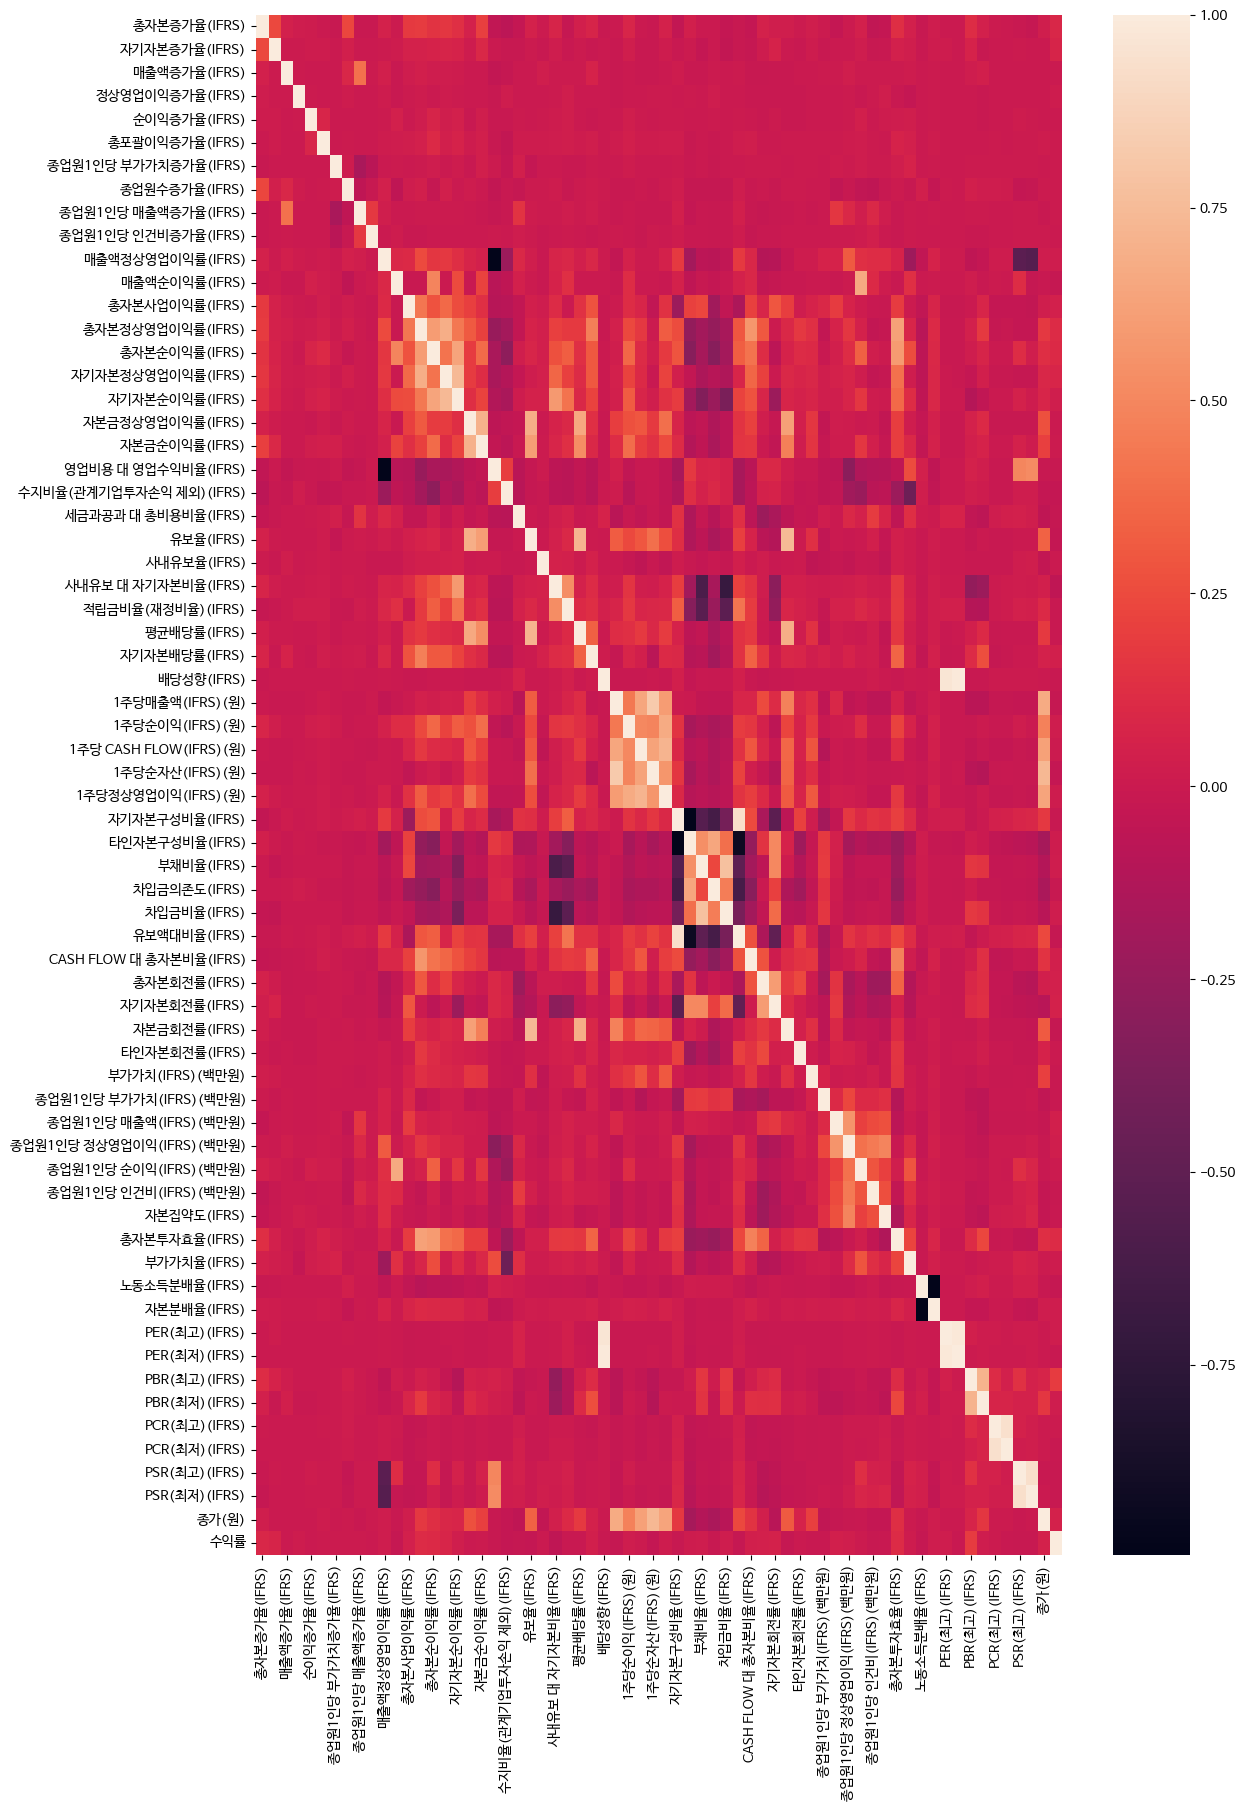

In [25]:
import matplotlib.pyplot as plt
heatmap_data = drop_df.iloc[:,3:]
plt.figure(figsize=(13.,20))
sns.heatmap(heatmap_data.corr())

In [27]:
fa_df.to_excel('facotr_analysis.xlsx')

In [29]:
change = pd.read_csv('data_files/종가변화율.csv')

In [30]:
change.head()

,연도,주식코드,종가변화율(%)
0,2015,30,-11.800000
1,2016,30,44.557823
2,2017,30,23.529412
3,2018,30,-0.952381
4,2019,30,-5.128205


In [31]:
df.head()

,회사명,거래소코드,회계년도,총자본증가율(IFRS),자기자본증가율(IFRS),매출액증가율(IFRS),정상영업이익증가율(IFRS),순이익증가율(IFRS),총포괄이익증가율(IFRS),종업원1인당 부가가치증가율(IFRS),...,PER(최고)(IFRS),PER(최저)(IFRS),PBR(최고)(IFRS),PBR(최저)(IFRS),PCR(최고)(IFRS),PCR(최저)(IFRS),PSR(최고)(IFRS),PSR(최저)(IFRS),종가(원),수익률
0,(주)BNK금융지주,138930,2011/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11050.0,NaN
1,(주)BNK금융지주,138930,2012/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,35.70,25.36,1.07,0.76,35.54,25.25,24.81,17.63,13200.0,0.194570
2,(주)BNK금융지주,138930,2013/12,3.06,-0.10,-9.17,-21.35,-23.99,-24.03,-24.00,...,54.40,41.28,1.24,0.94,51.66,39.19,31.64,24.00,16000.0,0.212121
3,(주)BNK금융지주,138930,2014/12,29.42,29.69,284.69,462.71,482.95,481.72,375.54,...,10.64,8.49,1.08,0.86,10.75,8.58,9.37,7.48,14500.0,-0.093750
4,(주)BNK금융지주,138930,2015/12,15.53,15.07,-83.81,-97.07,-98.21,-98.24,-96.00,...,680.92,328.61,1.07,0.52,0.00,0.00,66.25,31.97,8420.0,-0.419310
